1. (a) Calculate and report the mean, median, maximum, minimum,
and standard deviation of monthly health expenditures for these data.
Plot two histograms of the data in which the y-axis gives the percent
of observations in the particular bin of health expenditures and the x-axis
gives the value of monthly health expenditures. Use percentage histograms
in which the height of each bar is the percent of observations in that bin (see
instructions in Jupyter notebook PythonVisualize.ipynb in Section 1.2).
In the first histogram, use 1,000 bins to plot the frequency of all the data.
In the second histogram, use 100 bins to plot the frequency of only monthly
health expenditures less-than-or-equal-to $800 (xi  800). Adjust the
frequencies of this second histogram to account for the observations that
you have not displayed (xi > 800). That is, the heights of the histogram
bars in the second histogram should not sum to 1 because you are only
displaying a fraction of the data. Comparing the two histograms, why
might you prefer the second one?

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import scipy.stats as sts
import statistics 

# Load in and display the data
claims = np.loadtxt('clms.txt')
print(claims)

# Give summary stats of the health expenditures data
exp_mean = statistics.mean(claims)
print('Mean is:', exp_mean)
exp_median = statistics.median(claims)
print('Median is:', exp_median)
exp_max = max(claims)
print('Max is:', exp_max)
exp_min = min(claims)
print('Min is:', exp_min)
exp_std = statistics.stdev(claims)
print('Standard deviation is:', exp_std)

[ 361.65  123.04  541.77 ...,   97.43  186.88  119.19]
Mean is: 720.277975327
Median is: 172.21
Max is: 227967.25
Min is: 0.01
Standard deviation is: 3972.850824119446


<IPython.core.display.Javascript object>


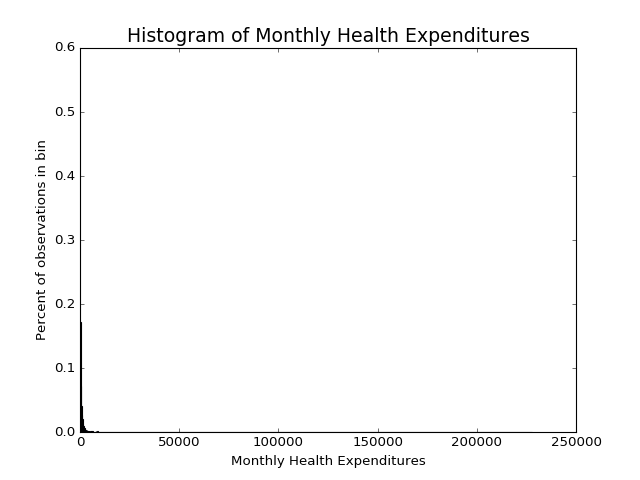

Histogram bars sum to: 1.0


In [2]:
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
%matplotlib notebook
#plt.ioff()

# Plot histograms of the data
# Histogram 1
num_bins1 = 1000
weights1 = (1 / claims.shape[0]) * np.ones_like(claims)
plt.figure
n1, bin_cuts, patches = plt.hist(claims, num_bins1, weights=weights1)
plt.title('Histogram of Monthly Health Expenditures', fontsize=17)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')

print('Histogram bars sum to:', n1.sum())

<IPython.core.display.Javascript object>


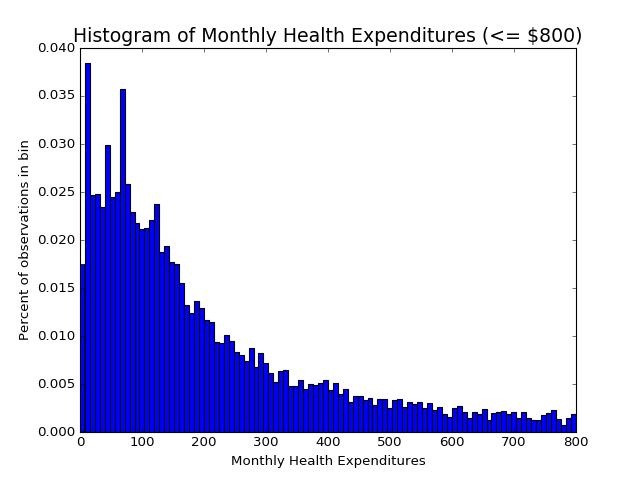

Histogram bars sum to: 0.849420849421


In [3]:
# Histogram 2
num_bins2 = 100
claims_800 = claims[claims <= 800]
weights2 = (1 / claims.shape[0]) * np.ones_like(claims_800)
plt.figure
n2, bin_cuts, patches = plt.hist(claims_800, num_bins2, weights=weights2)
plt.title('Histogram of Monthly Health Expenditures (<= $800)', fontsize=17)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 800])

print('Histogram bars sum to:', n2.sum())

(b) Using MLE, fit the gamma GA(x; alpha; beta) distribution to the in-
dividual observation data. Use beta_0 = Var(x)/E(x) and alpha_0 = E(x)/beta_0 as
your initial guess. Report your estimated values for alpha^hat and beta^hat, as well as
the value of the maximized log likelihood function lnL(theta^hat). Plot the sec-
ond histogram from part (a) overlayed with a line representing the implied
histogram from your estimated gamma (GA) distribution.

In [4]:
# Define function that generates values of a gamma pdf
import scipy.special as spe

def gamma_pdf(xvals, alpha, beta):
        
    #pdf_vals = ((pow(xvals,alpha-1))*np.exp(-xvals/beta))/(spe.gamma(alpha)*(pow(beta,alpha)))
    pdf_vals = xvals**(alpha-1)*(np.exp(-xvals/beta)/(spe.gamma(alpha)*beta**alpha))
    #pdf_vals = sts.gamma.pdf(xvals, alpha, loc = 0, scale = beta)
    
    return pdf_vals

In [5]:
# Define log likelihood function for the gamma distribution
def log_lik_gamma(xvals, alpha, beta):
    
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    #ln_pdf_vals = (alpha-1)*np.log(xvals)-xvals/beta-np.log(spe.gamma(alpha))-alpha*np.log(beta)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [6]:
def crit(params, args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [7]:
# Set up initial guesses
claims_var = claims
beta_0 = statistics.variance(claims_var)/statistics.mean(claims_var)
alpha_0 = statistics.mean(claims_var)/beta_0

print('Initial alpha_0=', alpha_0, 'Initial beta_0=', beta_0)

import scipy.optimize as opt
print(crit(np.array([0.47,1500]),claims_var))

mle_args = (claims_var)
params_init = np.array([alpha_0,beta_0])
results = opt.minimize(crit, params_init, args=(mle_args), bounds = ((0, None), (0, None)))
print(results)
alpha_MLE, beta_MLE = results.x
max_log_lik = log_lik_gamma(claims_var,alpha_MLE,beta_MLE)
print('alpha_MLE=', alpha_MLE, ' beta_MLE=', beta_MLE, 'log Likelihood=', max_log_lik)

Initial alpha_0= 0.0328697010358 Initial beta_0= 21913.1282801
77724.7404813
      fun: 82076.640496469714
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        ,  0.09167707])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21750947e-01,   2.19131283e+04])
alpha_MLE= 0.221750946983  beta_MLE= 21913.1282769 log Likelihood= -82076.6404965


<IPython.core.display.Javascript object>


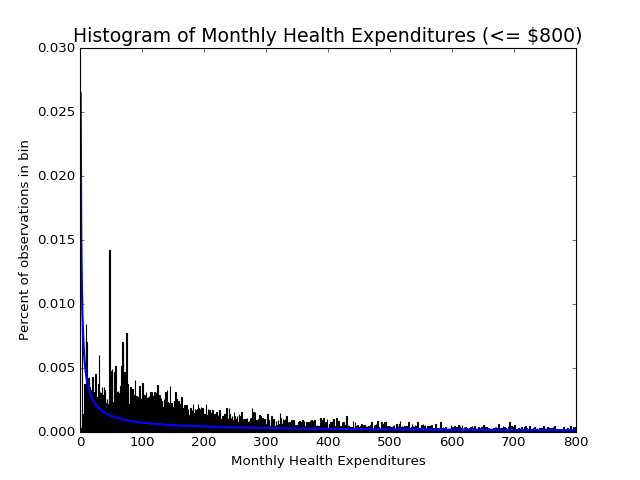

C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in power


In [8]:
# Plot the second histogram along with the gamma density with the MLE coefficients
num_bins2 = 100
claims_800 = claims[claims < 800]
weights2 = (1 / claims.shape[0]) * np.ones_like(claims_800)
n2, bin_cuts, patches = plt.hist(claims_800, 800, weights=weights2)
plt.title('Histogram of Monthly Health Expenditures (<= $800)', fontsize=17)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 800])

# Plot the MLE estimated distribution
dist_pts = np.linspace(0,800,800)
plt.plot(dist_pts, gamma_pdf(dist_pts, alpha_MLE, beta_MLE),
         linewidth=2, color='b', label='3: $\alpha$=,$\beta$=')
plt.legend(loc='upper left')


(c) Using MLE, fit the generalized gamma GG(x; alpha; beta; m) distribu-
tion to the individual observation data. Use your estimates for alpha and beta
from part(b), as well as m = 1, as your initial guess. Report your estimated
values for alpha_hat, beta_hat, and m_hat, as well as the value of the maximized log likelihood
function lnL. Plot the second histogram from part (a) overlayed with a
line representing the implied histogram from your estimated generalized
gamma (GG) distribution.

In [9]:
# Define function that generates values of a generalized gamma pdf
def gen_gamma_pdf(xvals, alpha, beta, m):
        
    #pdf_vals = ((pow(xvals,alpha-1))*np.exp(-xvals/beta))/(spe.gamma(alpha)*(pow(beta,alpha)))
    pdf_vals = m*xvals**(alpha-1)*(np.exp(-(xvals/beta)**m)/(spe.gamma(alpha/m)*beta**alpha))
    #pdf_vals = sts.gamma.pdf(xvals, alpha, loc = 0, scale = beta)
    
    return pdf_vals

In [10]:
# Define log likelihood function for the generalized gamma distribution
def log_lik_gen_gamma(xvals, alpha, beta, m):
    
    pdf_vals = gen_gamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    #ln_pdf_vals = (alpha-1)*np.log(xvals)-xvals/beta-np.log(spe.gamma(alpha))-alpha*np.log(beta)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [11]:
def crit_ggam(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gen_gamma(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [12]:
# Set up initial guesses
claims_var = claims
beta_0 = beta_MLE
alpha_0 = alpha_MLE
m_0 = 1

print('Initial alpha_0=', alpha_0, 'Initial beta_0=', beta_0, 'Initial m_0=', m_0)
#print(crit(np.array([0.47,1500]),claims_var))

mle_args = (claims_var)
params_init = np.array([alpha_0,beta_0,m_0])
results = opt.minimize(crit_ggam, params_init, args=(mle_args), bounds = ((0, None), (0, None), (0, None)))
print(results)
alpha_MLE_ggam, beta_MLE_ggam, m_MLE_ggam = results.x
max_log_lik = log_lik_gen_gamma(claims_var,alpha_MLE_ggam,beta_MLE_ggam,m_MLE_ggam)
print('alpha_MLE=', alpha_MLE_ggam, ' beta_MLE=', beta_MLE_ggam, 'm_MLE=', m_MLE_ggam, 'log Likelihood=', max_log_lik)

Initial alpha_0= 0.221750946983 Initial beta_0= 21913.1282769 Initial m_0= 1
      fun: 82076.635624412767
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.67581379,  0.09167707, -1.0477379 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([  2.21733146e-01,   2.19131280e+04,   9.97074936e-01])
alpha_MLE= 0.221733146243  beta_MLE= 21913.1280036 m_MLE= 0.997074935631 log Likelihood= -82076.6356244


<IPython.core.display.Javascript object>


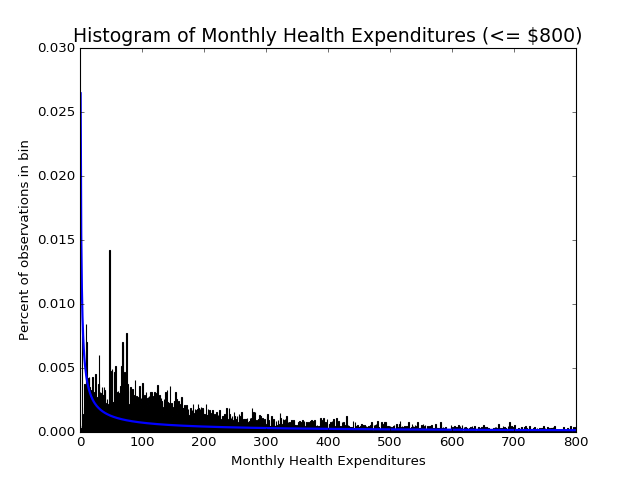

C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in power


In [13]:
# Plot the second histogram along with the gamma density with the MLE coefficients
num_bins2 = 100
claims_800 = claims[claims < 800]
weights2 = (1 / claims.shape[0]) * np.ones_like(claims_800)
n2, bin_cuts, patches = plt.hist(claims_800, 800, weights=weights2)
plt.title('Histogram of Monthly Health Expenditures (<= $800)', fontsize=17)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 800])

# Plot the MLE estimated distribution for generalized gamma
dist_pts = np.linspace(0,800,800)
plt.plot(dist_pts, gen_gamma_pdf(dist_pts, alpha_MLE_ggam, beta_MLE_ggam, m_MLE_ggam),
         linewidth=2, color='b', label='3: $\alpha$=,$\beta$=')
plt.legend(loc='upper left')

(d) Using MLE, fit the generalized beta 2 GB2(x; a; b; p; q) distribu-
tion to the individual observation data. Use your estimates for alpha, beta, and
m from part (c), as well as q = 10,000, as your initial guess. Report your
estimated values for a_hat, b_hat
, p_hat, and q_hat, as well as the value of the maximized
log likelihood function lnL. Plot the second histogram from part(a) over-
layed with a line representing the implied histogram from your estimated
generalized beta 2 (GB2) distribution.

In [14]:
# Define function that generates values of a generalized beta2 pdf
def gen_beta2_pdf(xvals, a, b, p, q):
        
    #pdf_vals = ((pow(xvals,alpha-1))*np.exp(-xvals/beta))/(spe.gamma(alpha)*(pow(beta,alpha)))
    pdf_vals = a*xvals**(a*p-1)/(b**(a*p)*(1+(xvals/b)**a)**(p+q)*spe.beta(p,q))
    #pdf_vals = sts.gamma.pdf(xvals, alpha, loc = 0, scale = beta)
    
    return pdf_vals

In [15]:
# Define log likelihood function for the generalized beta2 distribution
def log_lik_beta2(xvals, a, b, p, q):
    
    pdf_vals = gen_beta2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    #ln_pdf_vals = (alpha-1)*np.log(xvals)-xvals/beta-np.log(spe.gamma(alpha))-alpha*np.log(beta)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [16]:
def crit_beta2(params, args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_beta2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [17]:
# Set up initial guesses
claims_var = claims
#a_0 = alpha_MLE_ggam
#b_0 = beta_MLE_ggam
#p_0 = m_MLE_ggam
#q_0 = 10000

a_0 = m_MLE_ggam
q_0 = 10000
b_0 = q_0**(1/m_MLE_ggam)*beta_MLE_ggam
p_0 = alpha_MLE_ggam/m_MLE_ggam

print('Initial a_0=', a_0, 'Initial b_0=', b_0, 'Initial p_0=', p_0, 'Initial q_0=', q_0)
#print(crit(np.array([0.47,1500]),claims_var))

mle_args = (claims_var)
params_init = np.array([a_0,b_0,p_0,q_0])
results = opt.minimize(crit_beta2, params_init, args=(mle_args), bounds = ((0, None), (0, None), (0, None), (0, None)))
print(results)
a_MLE_beta2, b_MLE_beta2, p_MLE_beta2, q_MLE_beta2 = results.x
max_log_lik = log_lik_beta2(claims_var,a_MLE_beta2,b_MLE_beta2,p_MLE_beta2,q_MLE_beta2)
print('a_MLE=', a_MLE_beta2, ' b_MLE=', b_MLE_beta2, 'p_MLE=', p_MLE_beta2, 'q_MLE=', q_MLE_beta2, 'log Likelihood=', max_log_lik)

Initial a_0= 0.997074935631 Initial b_0= 225132895.781 Initial p_0= 0.222383632684 Initial q_0= 10000
      fun: 78391.618132134827
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  9.86700325e+03,   0.00000000e+00,  -6.12404983e+03,
         2.75031198e-01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 45
      nit: 3
   status: 0
  success: True
        x: array([  8.15299622e-01,   2.25132896e+08,   3.70798318e-01,
         9.99999908e+03])
a_MLE= 0.815299622176  b_MLE= 225132895.781 p_MLE= 0.370798317691 q_MLE= 9999.99908002 log Likelihood= -78391.6181321


C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in power
C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log
C:\Users\Kyle\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:562: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


<IPython.core.display.Javascript object>


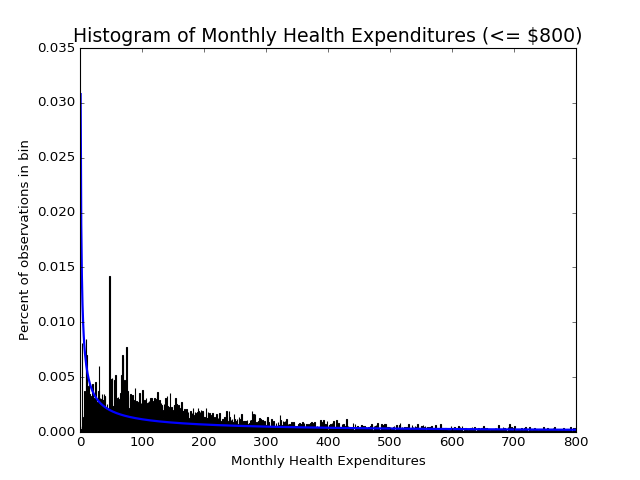

C:\Users\Kyle\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in power


In [18]:
# Plot the second histogram along with the generalized beta2 density with the MLE coefficients
num_bins2 = 100
claims_800 = claims[claims < 800]
weights2 = (1 / claims.shape[0]) * np.ones_like(claims_800)
n2, bin_cuts, patches = plt.hist(claims_800, 800, weights=weights2)
plt.title('Histogram of Monthly Health Expenditures (<= $800)', fontsize=17)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 800])

# Plot the MLE estimated distribution for generalized beta2
dist_pts = np.linspace(0,800,800)
plt.plot(dist_pts, gen_beta2_pdf(dist_pts, a_MLE_beta2, b_MLE_beta2, p_MLE_beta2, q_MLE_beta2),
         linewidth=2, color='b', label='3: $\alpha$=,$\beta$=')
plt.legend(loc='upper left')

(e) Perform a likelihood ratio test for each of the estimated in parts
(b) and (c), respectively, against the GB2 specification in part (d). This
is feasible because each distribution is a nested version of the GB2. The
degrees of freedom in the chi_squared(p) is 4, consistent with the GB2. Report the
chi_squared(4) values from the likelihood ratio test for the estimated GA and the
estimate GG.

In [20]:
log_lik_h0 = log_lik_beta2(claims, a_MLE_beta2, b_MLE_beta2, p_MLE_beta2, q_MLE_beta2)
log_lik_mle_gamma = log_lik_gamma(claims, alpha_MLE, beta_MLE)
log_lik_mle_gen_gamma = log_lik_gen_gamma(claims, alpha_MLE_ggam, beta_MLE_ggam, m_MLE_ggam)
LR_val_gamma = 2 * (log_lik_mle_gamma - log_lik_h0)
LR_val_gen_gamma = 2 * (log_lik_mle_gen_gamma - log_lik_h0)
print('LR ratio value for gamma:', LR_val_gamma)
print('LR ratio value for generalized gamma:', LR_val_gen_gamma)
pval_h0_gamma = 1.0 - sts.chi2.cdf(LR_val_gamma, 4)
pval_h0_gen_gamma = 1.0 - sts.chi2.cdf(LR_val_gen_gamma, 4)
print('LR test for gamma vs beta2 p-value = ', pval_h0_gamma)
print('LR test for generalized gamma vs beta2 p-value = ', pval_h0_gen_gamma)

LR ratio value for gamma: -7370.04472867
LR ratio value for generalized gamma: -7370.03498456
LR test for gamma vs beta2 p-value =  1.0
LR test for generalized gamma vs beta2 p-value =  1.0


(f) Using the estimated GB2 distribution from part (d), how likely
am I to have a monthly health care claim of more than $1,000? How does
this amount change if I use the estimated GA distribution from part (b)?

In [27]:
import scipy.integrate as integrate

beta2_lik_1000 = 1-integrate.quad(lambda x: gen_beta2_pdf(x, a_MLE_beta2, b_MLE_beta2, p_MLE_beta2, q_MLE_beta2), 0, 1000)[0]
gamma_lik_1000 = 1-integrate.quad(lambda x: gamma_pdf(x, alpha_MLE, beta_MLE), 0, 1000)[0]

print('Probability of claim above $1000 using beta2 estimate:', beta2_lik_1000)
print('Probability of claim above $1000 using gamma estimate:', gamma_lik_1000)

Probability of claim above $1000 using beta2 estimate: 0.2612794247754272
Probability of claim above $1000 using gamma estimate: 0.45196392111966377
